In [72]:
# Mount Google Drive to access files stored in your Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
# Import pandas and load the salary dataset from Google Drive
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Python Projects/Day 72/salaries_by_college_major.csv')

In [74]:
# Display the first few rows of the dataset to get an overview
df.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
0,Accounting,"46,000.00","77,100.00","42,200.00","152,000.00",Business
1,Aerospace Engineering,"57,700.00","101,000.00","64,300.00","161,000.00",STEM
2,Agriculture,"42,600.00","71,900.00","36,300.00","150,000.00",Business
3,Anthropology,"36,800.00","61,500.00","33,800.00","138,000.00",HASS
4,Architecture,"41,600.00","76,800.00","50,600.00","136,000.00",Business


In [75]:
# Nulls per Column
df.isna().sum()

,0
Undergraduate Major,0
Starting Median Salary,1
Mid-Career Median Salary,1
Mid-Career 10th Percentile Salary,1
Mid-Career 90th Percentile Salary,1
Group,1


In [76]:
# Display the last few rows of the DataFrame
df.tail()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
46,Psychology,"35,900.00","60,400.00","31,600.00","127,000.00",HASS
47,Religion,"34,100.00","52,000.00","29,700.00","96,400.00",HASS
48,Sociology,"36,500.00","58,200.00","30,700.00","118,000.00",HASS
49,Spanish,"34,000.00","53,100.00","31,000.00","96,400.00",HASS
50,Source: PayScale Inc.,NaN,NaN,NaN,NaN,NaN


In [77]:
# Remove null values
clean_df = df.dropna()
clean_df.tail()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
45,Political Science,"40,800.00","78,200.00","41,200.00","168,000.00",HASS
46,Psychology,"35,900.00","60,400.00","31,600.00","127,000.00",HASS
47,Religion,"34,100.00","52,000.00","29,700.00","96,400.00",HASS
48,Sociology,"36,500.00","58,200.00","30,700.00","118,000.00",HASS
49,Spanish,"34,000.00","53,100.00","31,000.00","96,400.00",HASS


In [78]:
# Make sure salary columns are numeric
salary_cols = [c for c in df.columns if "Salary" in c]
df[salary_cols] = df[salary_cols].replace('[\$,]', '', regex=True).astype(float)

In [79]:
# Unique majors & most common majors
print("Unique majors:", df['Undergraduate Major'].nunique())
df['Undergraduate Major'].value_counts().head(10)

Unique majors: 51


,count
Undergraduate Major,
Accounting,1
Aerospace Engineering,1
Agriculture,1
Anthropology,1
Architecture,1
Art History,1
Biology,1
Business Management,1
Chemical Engineering,1


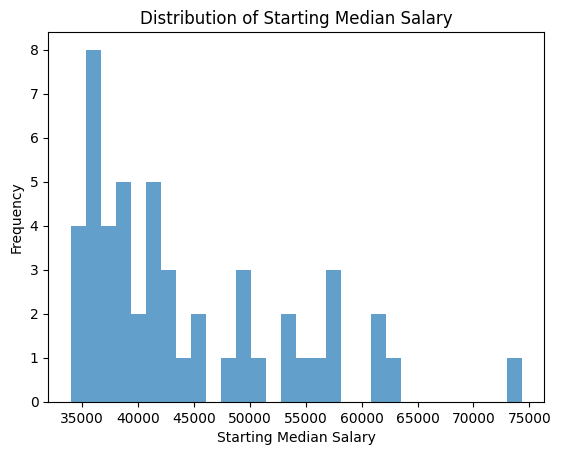

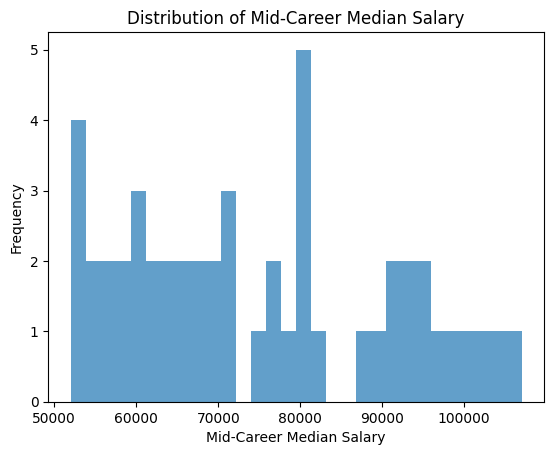

In [80]:
# Distribution of salaries
import matplotlib.pyplot as plt

for col in ['Starting Median Salary', 'Mid-Career Median Salary']:
    df[col].plot(kind='hist', bins=30, alpha=0.7, title=f"Distribution of {col}")
    plt.xlabel(col); plt.show()

In [81]:
# Growth % from starting to mid-career
df['Growth %'] = ((df['Mid-Career Median Salary'] - df['Starting Median Salary'])
                  / df['Starting Median Salary'] * 100)
df[['Undergraduate Major', 'Growth %']].sort_values('Growth %', ascending=False).head(10)

,Undergraduate Major,Growth %
37,Math,103.52
42,Philosophy,103.51
33,International Relations,97.80
17,Economics,96.81
36,Marketing,95.10
44,Physics,93.44
45,Political Science,91.67
9,Chemistry,87.56
34,Journalism,87.36
4,Architecture,84.62


In [82]:
# Salary range (mid-career 90th – 10th percentile)
df['Salary Range'] = (df['Mid-Career 90th Percentile Salary']
                      - df['Mid-Career 10th Percentile Salary'])
df[['Undergraduate Major', 'Salary Range']].sort_values('Salary Range', ascending=False).head(10)

,Undergraduate Major,Salary Range
17,Economics,"159,400.00"
22,Finance,"147,800.00"
37,Math,"137,800.00"
36,Marketing,"132,900.00"
42,Philosophy,"132,500.00"
45,Political Science,"126,800.00"
8,Chemical Engineering,"122,100.00"
44,Physics,"122,000.00"
33,International Relations,"118,800.00"
16,Drama,"116,300.00"


In [83]:
# Risk level flag (high variance majors)
threshold = df['Salary Range'].median()
df['Risk Level'] = df['Salary Range'].apply(lambda x: 'High' if x > threshold else 'Low')
df['Risk Level'].value_counts()

,count
Risk Level,
Low,26
High,25


In [84]:
# Top/bottom majors by salary percentiles
top_90th = df.nlargest(10, 'Mid-Career 90th Percentile Salary')
bottom_10th = df.nsmallest(10, 'Mid-Career 10th Percentile Salary')

print("🔝 High-reward majors:\n", top_90th[['Undergraduate Major','Mid-Career 90th Percentile Salary']])
print("\n🔻 Lower-end majors:\n", bottom_10th[['Undergraduate Major','Mid-Career 10th Percentile Salary']])

🔝 High-reward majors:
        Undergraduate Major  Mid-Career 90th Percentile Salary
17               Economics                         210,000.00
22                 Finance                         195,000.00
8     Chemical Engineering                         194,000.00
37                    Math                         183,000.00
44                 Physics                         178,000.00
36               Marketing                         175,000.00
30  Industrial Engineering                         173,000.00
14            Construction                         171,000.00
19  Electrical Engineering                         168,000.00
42              Philosophy                         168,000.00

🔻 Lower-end majors:
    Undergraduate Major  Mid-Career 10th Percentile Salary
39               Music                          26,700.00
5          Art History                          28,800.00
18           Education                          29,300.00
47            Religion                   

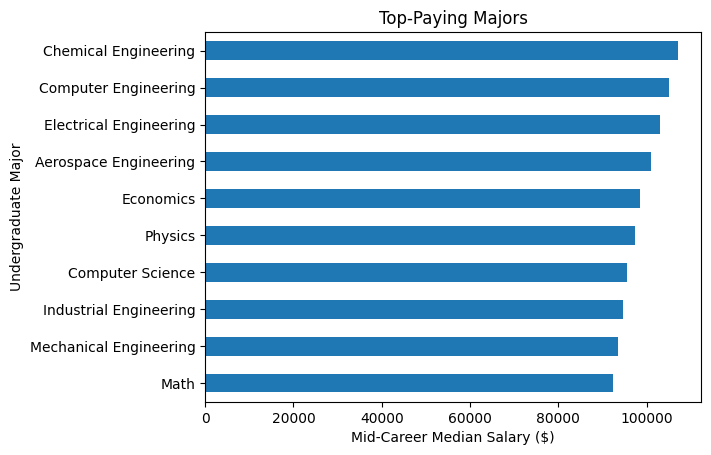

In [85]:
# Top majors by mid-career median
top10_mid = df.nlargest(10, 'Mid-Career Median Salary')
top10_mid.plot(kind='barh', x='Undergraduate Major', y='Mid-Career Median Salary', legend=False)
plt.xlabel("Mid-Career Median Salary ($)"); plt.title("Top-Paying Majors"); plt.gca().invert_yaxis()
plt.show()

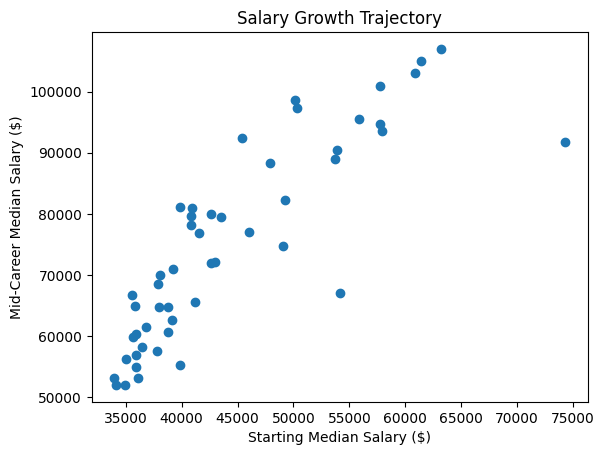

In [86]:
# starting vs mid-career salary
plt.scatter(df['Starting Median Salary'], df['Mid-Career Median Salary'])
plt.xlabel("Starting Median Salary ($)")
plt.ylabel("Mid-Career Median Salary ($)")
plt.title("Salary Growth Trajectory")
plt.show()

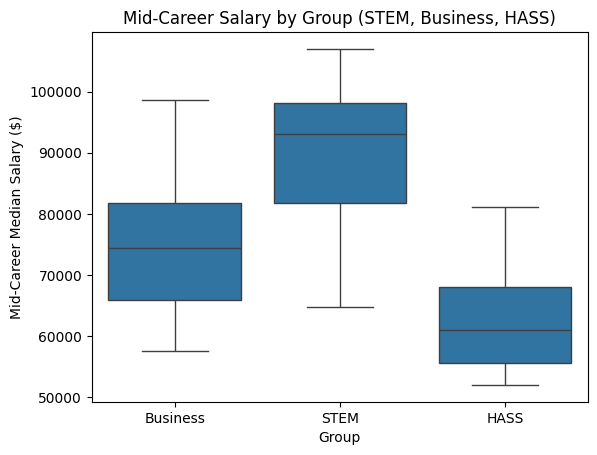

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot comparing Mid-Career Median Salary by Group
sns.boxplot(data=df, x='Group', y='Mid-Career Median Salary')
plt.title("Mid-Career Salary by Group (STEM, Business, HASS)")
plt.xlabel("Group")
plt.ylabel("Mid-Career Median Salary ($)")
plt.show()